ID1: 305674731

ID2: 209028067

Date:

##### Advanced Statistical Analysis and Model-Based Learning (Fall 2024-2025)
# Home Assignment 4
#### Topics:
- Statistical Estimation
- Hypothesis Testing in one and two samples
- ANOVA

#### Due: 6/1/2025 by 18:30

#### Instructions:
- Write your IDs and date at the top cell.
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding exercises.
- For theoretic exercises, you can either write your solution in the notebook using $\LaTeX$ (preferred) or submit additional notes.

<hr>
<hr>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from itertools import combinations
from scipy.stats import ttest_ind
import scipy.stats

## Problem 1: ANOVA and Multiple Comparisons
Consider Israeli wines in the wine dataset ``winemag-data_first150k.csv`` used in class (downloaded from Kaggle https://www.kaggle.com/datasets/zynicide/wine-reviews?select=winemag-data_first150k.csv). Use ANOVA to measure the effect of winery (``winary``) and price (``price``) on the quality (``points``) of wine of variety ``Cabernet Sauvignon``. Note: you can ignore the ``province`` filed in the data because it contains inaccurate information.

Load dataset; replace the word ``Gamla`` with ``Golan Height Winary`` because this is the correct name of the winery; keep only relevant records according to the fields ``country`` and ``veriaty``; if you find any duplicated records in the data, remove those that are redundant. Also, we only include wineries with at least 3 samples. You can achieve the above by the code at the next cell.

### **Answer 1:**

In [2]:
import pandas as pd
wine_df = pd.read_csv("winemag-data_first150k.csv")
variety = 'Cabernet Sauvignon'
min_per_group = 3
israeli_wines = wine_df[(wine_df.country == 'Israel') & (wine_df.variety == variety)]\
                .filter(['country', 'description','designation', 'points',
                         'price','region_1', 'region_2', 'variety', 'winery'])\
                .replace('Gamla', 'Golan Heights Winery')\
                .drop_duplicates(keep='first')\
                .groupby('winery')\
                .filter(lambda x : len(x) >= min_per_group)

<ipython-input-2-ba7290993430>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace('Gamla', 'Golan Heights Winery')\


In [3]:
israeli_wines

,country,description,designation,points,price,region_1,region_2,variety,winery
81,Israel,"Dark red violet in color, this wine has aromas...",Reserve,91,25.0,NaN,NaN,Cabernet Sauvignon,Binyamina
355,Israel,Restrained aromas of black plum barely set the...,NaN,91,40.0,NaN,NaN,Cabernet Sauvignon,Bazelet HaGolan
966,Israel,"This wine is dark red-violet color to the eye,...",Special Reserve,90,20.0,NaN,NaN,Cabernet Sauvignon,Segal's
970,Israel,"Dark garnet in the glass, this wine has a nose...",Mt. Tabor,90,15.0,NaN,NaN,Cabernet Sauvignon,Tabor
977,Israel,"Dark black cherry in color, this wine offers a...",NaN,90,55.0,NaN,NaN,Cabernet Sauvignon,Yatir
...,...,...,...,...,...,...,...,...,...
81782,Israel,Light cassis and black currant aromas softly a...,20 Months Barrel Aged Reserve,84,22.0,NaN,NaN,Cabernet Sauvignon,Barkan
86014,Israel,Dark garnet in color with an intense nose load...,Single Vineyard Kosher,87,35.0,NaN,NaN,Cabernet Sauvignon,Psagot
87563,Israel,Straightforward and very drinkable with notes ...,Kosher,85,15.0,NaN,NaN,Cabernet Sauvignon,Recanati
91397,Israel,"Standard Cab characteristics of black currant,...",Kosher,84,15.0,NaN,NaN,Cabernet Sauvignon,Recanati


1. Plot the boxplot with ``winery`` as the x-axis and ``points`` as the y-axis.
2. Use ANOVA to figure out whether some wineries make better Cabernets than others; print the ANOVA table and explain your conclusion.

3. **Multiple Comparisons**. Find which wineries have Cabernets ranked higher than others:

    3.1. Run all t-tests of pairs of wineries; how many of the test's P-values fall below 0.05? Is it more than what expceted if all tests are null?

    3.2. Use Bonferroni's method to decide which wineries ranked significantly higher than others by reporting on the list of pairs whose P-value is significant after Bonferroni's correction. Also indicate which one is ranked higher out of each pair.

4. **Contrasts**. Using a single t-test, test the assumption that Cabernets in the Golan area wineries: ``Bazelet HaGolan``, ``Golan Heights Winery`` have the same quality as Judean Hills area wineries: ``Katlav``, ``Psagot``, ``Shiloh Winery``, ``Titora``, ``Yatir``. Assume that the variance of all wineries in the data is the same (not only the two involved in the comparison).

5. **Multiple Comparisons and FDR**.
Consider P-values from all t-tests of pairs of wineries.

    5.1. Sort the P-values from small to large and plot the smallest 10% of the sorted list of P-values on a stem or a scatter plot in which the x-axis indicates the P-value rank (left most point is rank = 1, i.e., the smallest) and the y-axis the P-value's value.

    5.2. Assume that different tests are independent; apply BH to select a set of winery pairs in which one winery is significantly better than the others while aiming for 0.05 false pairs. How many pairs were reported? is it more or less pairs than you discovered using Bonfferoni correction

    5.3. Repeat the last item without the independence assumption, i.e., use the harmonic sum correction.

The point: FDR controlling using BH is a more liberal (less conservative) approach to identify significant discoveries in the sense that it allows us to report on more discoveries if we are willing to replace family-wise error rate control with an expected false-discovery proportion guarantee.  


###(1)
Plot the boxplot with ``winery`` as the x-axis and ``points`` as the y-axis.

<ipython-input-4-374c1210cfca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=israeli_wines, x='winery', y='points', palette="Set3")


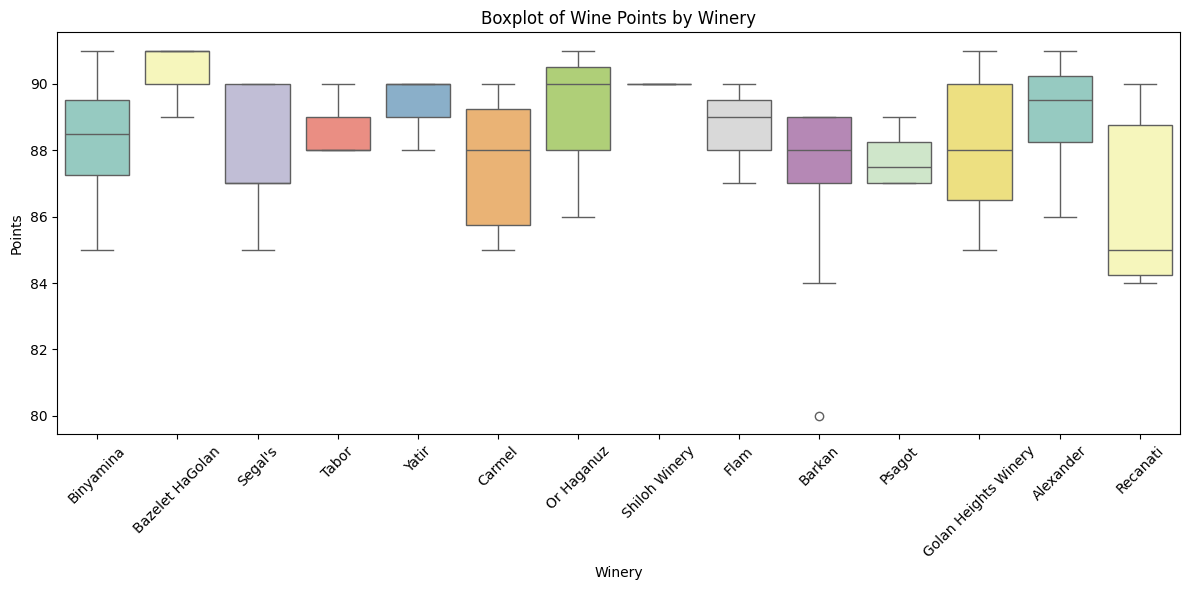

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=israeli_wines, x='winery', y='points', palette="Set3")
plt.title('Boxplot of Wine Points by Winery')
plt.xlabel('Winery')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### (2)

Use ANOVA to figure out whether some wineries make better Cabernets than others

In [5]:
IL_cabernet_df = israeli_wines[israeli_wines['variety'] == 'Cabernet Sauvignon']

# ANOVA
anova_model = ols('points ~ winery', data=IL_cabernet_df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

print(anova_table)

              sum_sq    df        F   PR(>F)
winery     83.235762  13.0  1.33827  0.21891
Residual  272.707900  57.0      NaN      NaN


The $p-value = 0.236$ is greater than the typical significance threshold $α = 0.05$, which means there is not enough evidence to reject H₀.

Since we are not rejecting H₀, the conclusion is that the data does not provide sufficient evidence to claim that some wineries produce significantly better Cabernet Sauvignon wines than others. This does not prove H₀ to be true, but rather that the evidence is not strong enough to reject it.

### (3.1)


In [6]:
# find unique wineries name
wineries = IL_cabernet_df['winery'].unique()

# pairwise t-tests
pairs = list(combinations(wineries, 2))
p_values = []
significant_pairs = []

for winery1, winery2 in pairs:
    group1 = IL_cabernet_df[IL_cabernet_df['winery'] == winery1]['points']
    group2 = IL_cabernet_df[IL_cabernet_df['winery'] == winery2]['points']
    t_stat, p_value = ttest_ind(group1, group2, equal_var=True)
    p_values.append((winery1, winery2, p_value))
    if p_value < 0.05:
        significant_pairs.append((winery1, winery2, p_value))

count_p_below_05 = sum(1 for _, _, p in p_values if p < 0.05)

# expected number of false positives if null hypothesis holds for all tests
expected_false_positives = 0.05 * len(pairs)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [7]:
print(f"Number of p-values below 0.05: {count_p_below_05}")
print(f"Expected number of false positives if null hypothesis holds for all tests: {expected_false_positives}")
print(f"Is Observed > Expected? {'Yes' if count_p_below_05 > expected_false_positives else 'No'}")

Number of p-values below 0.05: 4
Expected number of false positives if null hypothesis holds for all tests: 4.55
Is Observed > Expected? No


### (3.2)

In [8]:
# bonferroni correction
alpha = 0.05
bonferroni_threshold = alpha / len(pairs)
bonferroni_significant_pairs = [
    (winery1, winery2, p_value)
    for winery1, winery2, p_value in p_values
    if p_value < bonferroni_threshold
]

results_df = pd.DataFrame(p_values, columns=["Winery 1", "Winery 2", "P-value"])
bonferroni_df = pd.DataFrame(
    bonferroni_significant_pairs, columns=["Winery 1", "Winery 2", "P-value"]
)

print("Pairwise T-Test Results:")
print(results_df.head())
print("\nSignificant Pairs After Bonferroni Correction:")
print(bonferroni_df)

Pairwise T-Test Results:
    Winery 1         Winery 2   P-value
0  Binyamina  Bazelet HaGolan  0.244661
1  Binyamina          Segal's  0.780487
2  Binyamina            Tabor  0.802610
3  Binyamina            Yatir  0.523598
4  Binyamina           Carmel  0.653384

Significant Pairs After Bonferroni Correction:
Empty DataFrame
Columns: [Winery 1, Winery 2, P-value]
Index: []


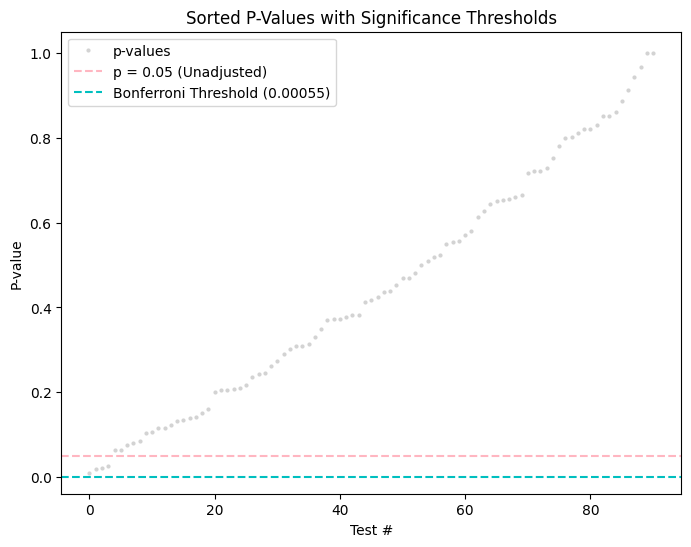

In [9]:
sorted_p_values = results_df["P-value"].sort_values().reset_index(drop=True)

plt.figure(figsize=(8, 6))
plt.plot(sorted_p_values, marker="o",markersize=2 ,color ='lightgray',linestyle="", label="p-values")
plt.axhline(0.05, color="lightpink", linestyle="--", label="p = 0.05 (Unadjusted)")
plt.axhline(bonferroni_threshold, color="c", linestyle="--", label=f"Bonferroni Threshold ({bonferroni_threshold:.5f})")
plt.title("Sorted P-Values with Significance Thresholds")
plt.xlabel("Test #")
plt.ylabel("P-value")
plt.legend()
plt.show()


As shown in the results and the plot above we can conclude that after adjusting for multiple comparisons using Bonferroni correction, there is no evidence to suggest that any pair of wineries produces "Cabernet Sauvignon" wines with significantly different quality scores. However, under less stringent criteria ($p=0.05$), some pairs ($=4$) may have appeared significant.


### (4)

In [10]:
# region
golan_wineries_names = ['Bazelet HaGolan', 'Golan Heights Winery']
judean_wineries_names = ['Katlav', 'Psagot', 'Shiloh Winery', 'Titora', 'Yatir']

# filter data for each region
golan_wineries = israeli_wines[israeli_wines['winery'].isin(golan_wineries_names)]
judean_wineries = israeli_wines[israeli_wines['winery'].isin(judean_wineries_names)]

# calc num of unique wineries in each region
k1 = golan_wineries['winery'].nunique()
k2 = judean_wineries['winery'].nunique()

# calc the weighted means for each region
g1 = golan_wineries.groupby('winery')['points'].mean().sum() / k1
g2 = judean_wineries.groupby('winery')['points'].mean().sum() / k2

# total observations and unique wineries
n = len(golan_wineries) + len(judean_wineries)
k = k1 + k2

ss_wit = ((golan_wineries['points'] - golan_wineries['points'].mean())**2).sum() + \
         ((judean_wineries['points'] - judean_wineries['points'].mean())**2).sum()
s = np.sqrt(ss_wit / (n - k))

# calc the t-statistic
t_stat = (g1 - g2) / (s * np.sqrt(
    (1 / k1 ** 2) * sum(1 / golan_wineries['winery'].value_counts()) +
    (1 / k2 ** 2) * sum(1 / judean_wineries['winery'].value_counts())
))

p_value = 2 * (1 - scipy.stats.t.cdf(np.abs(t_stat), n - k))  # Two-tailed test

In [11]:
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The two regions have significantly different wine quality.")
else:
    print("Fail to reject the null hypothesis: No significant difference in wine quality between the two regions.")

T-statistic: 0.23
P-value: 0.8238
Fail to reject the null hypothesis: No significant difference in wine quality between the two regions.


Since the p-value is greater than $\alpha = 0.05$, we fail to reject the null hypothesis. This means there is no statistically significant evidence to suggest a difference in the quality of Cabernets produced by wineries in the Golan area and the Judean Hills.

The test indicates that any observed differences in wine quality between the two regions are likely due to random variation rather than a meaningful or systematic difference in quality. Therefore, for this dataset and analysis, it can be concluded that Cabernets from the Golan area wineries and Judean Hills wineries have similar quality ratings.




### (5.1)

plot the smallest 10% of the sorted p-values

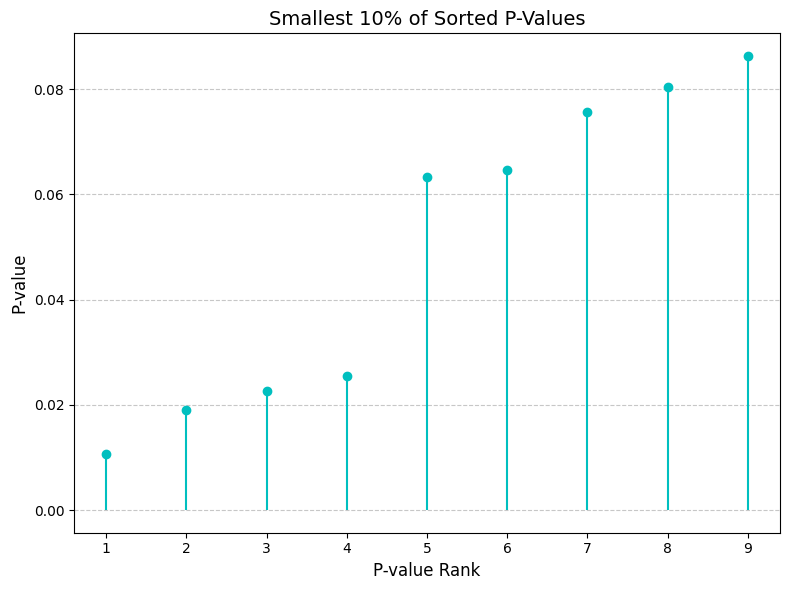

In [12]:
sorted_p_values = results_df["P-value"].sort_values()
top_10_percent_p_values = sorted_p_values[: int(len(sorted_p_values) * 0.1)]

ranks = range(1, len(top_10_percent_p_values) + 1)

plt.figure(figsize=(8, 6))
plt.stem(
    ranks,
    top_10_percent_p_values,
    linefmt="c",
    markerfmt="c",
    basefmt=" "
)
plt.title("Smallest 10% of Sorted P-Values", fontsize=14)
plt.xlabel("P-value Rank", fontsize=12)
plt.ylabel("P-value", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

### (5.2)

apply Benjamini-Hochberg correction (assuming independence)

In [13]:
m = len(sorted_p_values)

bh_thresholds = np.array([0.05 * (i / m) for i in range(1, m + 1)])

# comper sorted P-values to BH th
bh_significant = sorted_p_values <= bh_thresholds

# count the num of significant pairs under BH
bh_significant_count = np.sum(bh_significant)

print(f'The number of significant pairs under BH: {bh_significant_count}')

The number of significant pairs under BH: 0


Bonferroni Correction: identified 0 pairs as significant due to its strict TH.
Benjamini-Hochberg : that is typically less conservative, but also identified 0 pairs because the p-values were not small enough.

### (5.3)

apply harmonic sum correction (without independence assumption)

In [14]:
harmonic_numbers = np.cumsum(1 / np.arange(1, m + 1))
harmonic_thresholds = [0.05 / (m * h) for h in harmonic_numbers]
harmonic_significant = sorted_p_values <= harmonic_thresholds

# calc the num of significant pairs under harmonic correction
harmonic_significant_count = harmonic_significant.sum()
print(f'the num of significant pairs under harmonic correction :{harmonic_significant_count}')

the num of significant pairs under harmonic correction :0


Harmonic Correction that is even stricter, leading to the same result as BH and
Bonferroni.

This means that the winery pairs do not exhibit sufficiently strong statistical differences to meet the stringent thresholds of these corrections.


## Problem 2: Exact size of Bonferroni's test
Suppose that we run multiple tests, each against $H_{0i}$ for $i=1,\ldots,n$, with independent data and obtain P-values $p_1,\ldots,p_n$. We wish to test the null hypothesis:
$$
H_0\,:\,\text{All tests are null} = \cap_{i=1}^n H_{0i}
$$
at the level $\alpha$ (e.g., $\alpha=0.05$). In class, we introduced Bonferroni's procedure that guarantees a test of size $\alpha$ regardless of whether the hypotheses are independent or not. This means that $\alpha$ bounds the probability of falsely rejecting $H_0$ form above.

1. Argue that Bonferroni's procedure is equivalent to rejecting $H_0$ if $\min p_i \leq \alpha/n$.
2. Assuming that the hypotheses are independent, find the exact size of the test in Bonferroni's procedure. Namely, a better (smaller) upper bound on the test's size than $\alpha$.
3. For $\alpha=0.05$, evaluate the difference between $\alpha$ and the exact test's size for $n=2,...,50$. Discuss what you see.



### **Answer 2:**

### (1)

We will show that Bonferroni's procedure is equivalent to rejecting $H_0$ if $\min p_i \leq \alpha/n$.


As we know, the BP adjusts the $α$ for multiple testing to control the FWER at $α$. For each individual null hypothesis $H_{0i}$ is tested at the sl of $\frac{α}{n}$

$$H_0 \ is \ rejected \ if \ p_i \leq\frac{α}{n} $$

This procedure ensures that the probability of falsely rejecting any individual null hypothesis is controlled at $\frac{α}{n}$.

All null hypothesis states that all individual null hypotheses are true:

$$H_0\,:\,\text{All tests are null} = \cap_{i=1}^n H_{0i}$$

To rejcet $H_0$ we need at lease one null hypothesis $H_{0i}$ to reject, that means that
$$min \ p_i \leq \frac{α}{n}$$.

The BP ensures that $H_0$ is rejected if $min \ p_i \leq \frac{α}{n}$, controlling the FWER at $α$. This is the same since the procedure requiring all individual tests to be evaluated at a significance level of  $\frac{α}{n}$ ensures that the total null is only rejected when the smallest p-value meets this threshold.




### (2)

Assuming that the hypotheses are independent, find the exact size of the test in Bonferroni's procedure. Namely, a better (smaller) upper bound on the test's size than $\alpha$.

Lets define $p_1,...,p-_n$ as the $p-value$ of n independent hypothesis tests, and $H_0i$ represents the null hypothesis for the i-th test. And for the total tests we define $H_0\,:\,\text{All tests are null} = \cap_{i=1}^n H_{0i}$.

$$ P(reject H_0 | H_0 \ is \ true) = P(min \ p_i \leq \frac{α}{n})$$

For each test the the prob that $\ p_i > \frac{α}{n}$ is:

$$P( p_i > \frac{α}{n}) = 1 - \frac{α}{n} $$

Using the independency we get:

$$P(\ All \ p_i > \frac{α}{n}) = (1 - \frac{α}{n})^n $$

The prob to reject $H_0$ is complementry:

$$P(reject H_0) = 1 - (1 - \frac{α}{n})^n $$

The BP guarantees that $P(reject H_0) \leq α$

but with independence assuption, the exact size of the test is smaller because:

$$ 1 - (1 - \frac{α}{n})^n \leq α$$

Now we will use the large num role:

For large number of n we get that $(1 - \frac{α}{n})^n$ is approxamtly $e^{-α}$

From all of the above we get the aprox of the test size:

$$ 1- e^{-a} $$


### (3)

For $\alpha=0.05$, evaluate the difference between $\alpha$ and the exact test's size for $n=2,...,50$. Discuss what you see.


In [15]:
# params
alpha = 0.05
n_values = np.arange(2, 51)

# calc exact size of the test for each n and the diff
exact_sizes = [1 - (1 - alpha / n)**n for n in n_values]
differences = alpha - np.array(exact_sizes)

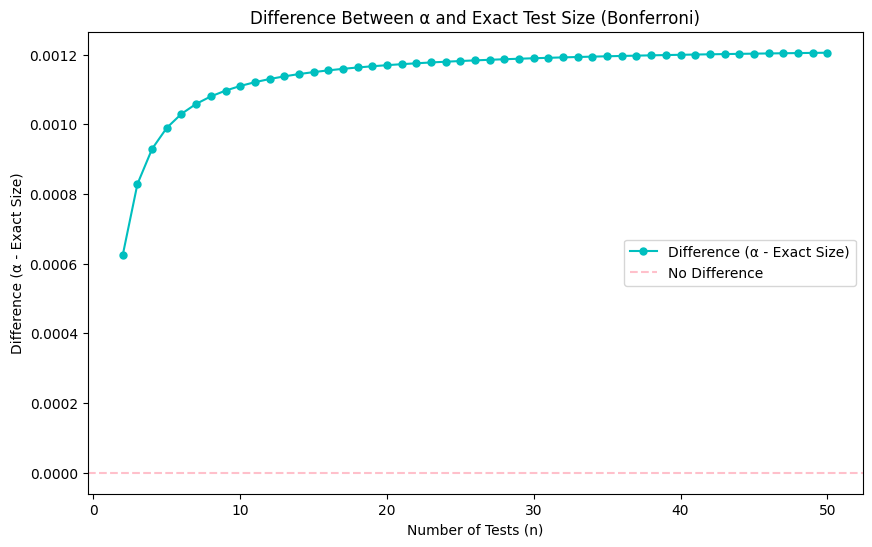

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(n_values, differences, marker="o",markersize=5 ,color='c' ,label="Difference (α - Exact Size)")
plt.axhline(0, color="pink", linestyle="--", label="No Difference")
plt.xlabel("Number of Tests (n)")
plt.ylabel("Difference (α - Exact Size)")
plt.title("Difference Between α and Exact Test Size (Bonferroni)")
plt.legend()
plt.show()



In [17]:
list(zip(n_values[:5],exact_sizes[:5] ,differences[:5]))

[(2, 0.04937500000000006, 0.000624999999999945),
 (3, 0.04917129629629646, 0.00082870370370354),
 (4, 0.049070288085937275, 0.000929711914062728),
 (5, 0.04900995010000009, 0.0009900498999999147),
 (6, 0.04896983531023591, 0.0010301646897640931)]

From the results we can see that:
- The pink dashed line at $y=0$ represents no difference, and the fact that all differences remain positive confirms that the Bonferroni correction is always conservative.
- For small n, the difference starts small but increases rapidly as n grows to 10 (can indicates that the Bonferroni correction becomes more conservative as n increases).
- Maybe For a small number of tests (in our case smaller then 10) the correction may not be overly conservative.
- After $n=20$ the difference stabilizes around 0.0012 means that the conservativeness of BP plateaus as n grows larger.
- For a larger number of tests (in our case around 20) methods like BH may be preferable for balancing error control and statistical power.




<hr>
<hr>

## Problem 3: Prediction in Simple Regression
Consider the linear model:
$$
    y_i = \beta_0 + \beta_1 x_i + \epsilon_i,\qquad \epsilon_i \overset{\text{i.i.d.}}{\sim} \mathcal N(0,\sigma^2)
$$
$$
    Z = \begin{pmatrix}
    1 & x_1 \\
    \vdots & \vdots \\
    1 & x_n
    \end{pmatrix},\quad \beta=\begin{pmatrix}
    \beta_0 \\
    \beta_1
    \end{pmatrix},\qquad \hat{\beta}=(Z^\top Z)^{-1} Z^\top y
$$
Suppose we get a new data point $x_{n+1}$ and want to predict $y_{n+1}$. We want an interval in which this prediction will likely to land. In class, we used that
$$
\operatorname{Var}[\hat{\beta}_0 + \hat{\beta}_1 x] = \sigma^2 \left( \frac{1}{n} + \frac{(x-\bar{x})^2}{S_{XX }}\right)
$$
to obtain a confidence interval for $\beta_0 + \beta_1 x$, and a confidence band for all $x \in \mathbb{R}$. In this question, you will use a similar reasoning to get a confidence interval (and bands) for $y_{n+1}$.
1. Find the varaince of $y_{n+1} - (\hat{\beta}_0 + \hat{\beta}_1 x_{n+1})$ in terms of $\sigma^2$ and $x_1,\ldots,x_n$ and $x_{n+1}$ (you can use $\bar{x}$ and $S_{XX}$ or any other well-defined function of $x_1,\ldots,x_n$). Explain intuitively why it makes sense that this variance is larger than the variance of  $\hat{\beta}_0 + \hat{\beta}_1 x_{n+1}$.
2. Find a $1-\alpha$ confidence interval for $y_{n+1}$. Is this interval wider or narrower than that of $\hat{\beta}_0 + \hat{\beta}_1 x_{n+1}$? For what value of $x_{n+1}$ this interval is the narrowest?
3. Suppose that we take the average of two responses $y$'s at the same $x_{n+1}$, say
$$
y_{n+1} =  \frac{y_{n+1}^{(1)} + y_{n+1}^{(2)}}{2},
$$
where
$$
y_{n+1}^{(1)} = \beta_0 + \beta_1 x_{n+1} + \epsilon_{n+1}^{(1)}
$$
and
$$
y_{n+1}^{(2)} = \beta_0 + \beta_1 x_{n+1} + \epsilon_{n+1}^{(2)},
$$
where $\epsilon_{n+1}^{(1)}$ and $\epsilon_{n+1}^{(2)}$ are independent. Find a confidence interval for $y_{n+1}$. Is it wider or narrower than the interval in (2) ?

Note: The confidence interval you derived in 2 is somewhat risky to use becasue it makes the strong assumption that $\epsilon_{n+1}$ is normal. This is compared to, say, confidence intrvals for $\hat{\beta}_0$ and $\hat{\beta}_1$ which rely on averages over all observations $y_1,\ldots,y_n$ so we can use the Central Limit Theorem to argue for normality. Things get better both in terms of varaince and normality when you can take multiple measurements at the same $x_{n+1}$ and average these measurements.


### **Answer 3:**

**1)**  
From the model  
$$ y_{n+1} \;=\; \beta_0 + \beta_1\,x_{n+1} \;+\;\epsilon_{n+1}, $$  
we have the prediction  
$$ \hat{y}_{n+1} \;=\; \hat{\beta}_0 + \hat{\beta}_1\,x_{n+1}+0. $$  
(Considering $\epsilon_{n+1}=0$ in our estimate).

Therefore,  
$$ y_{n+1} - \hat{y}_{n+1}\;=\;\bigl(\beta_0 - \hat{\beta}_0\bigr)\;+\;\bigl(\beta_1 - \hat{\beta}_1\bigr)\,x_{n+1}\;+\;\epsilon_{n+1}. $$
We know  
$$ \mathrm{Var}\bigl[\hat{\beta}_0 + \hat{\beta}_1 x_{n+1}\bigr]
\;=\;\sigma^2 \Bigl(\tfrac{1}{n} \;+\; \tfrac{(x_{n+1}-\bar{x})^2}{S_{XX}}\Bigr), $$  
and $ \epsilon_{n+1} $ is independent of the data used to estimate $ \hat{\beta}_0, \hat{\beta}_1 $ with variance $ \sigma^2 $. Hence, by independence,  
$$ \mathrm{Var}\bigl[y_{n+1} - \hat{y}_{n+1}\bigr]\;=\;
\;\sigma^2\;+\sigma^2 \Bigl(\tfrac{1}{n} \;+\; \tfrac{(x_{n+1}-\bar{x})^2}{S_{XX}}\Bigr)\;=\;\sigma^2 \Bigl(1 \;+\;\tfrac{1}{n} \;+\; \tfrac{(x_{n+1}-\bar{x})^2}{S_{XX}}\Bigr). $$

Intuitively, this variance is **larger** than the variance of $ \hat{\beta}_0 + \hat{\beta}_1 x_{n+1} $ because it includes the extra “one-shot” noise $ \epsilon_{n+1} $ from the new observation. In other words, predicting an actual future $ y_{n+1} $ must account for fresh randomness $ \epsilon_{n+1} $, whereas estimating the deterministic part $ \beta_0 + \beta_1 x_{n+1} $ does not.

---


**2)**  
A $ (1-\alpha) $ confidence interval for $ y_{n+1} $ is  
$$ y_{n+1}
\;=\;
\hat{y}_{n+1}
\;\pm\;
t_{n-2,\;1-\tfrac{\alpha}{2}}
\;\sqrt{\hat{\sigma}^2\;\Bigl(1 + \tfrac{1}{n} + \tfrac{(x_{n+1}-\bar{x})^2}{S_{XX}}\Bigr)}, $$

Where $\hat{y}_{n+1} = \hat{\beta}_0 + \hat{\beta}_1 x_{n+1}$,

$ \hat{\sigma}^2 $ is the usual unbiased estimator of $ \sigma^2 $, and $ t_{n-2,1-\frac{\alpha}{2}} $ is the appropriate $ t $-quantile with $ n-2 $ degrees of freedom.

This interval is **wider** than the interval for $ \beta_0 + \beta_1 x_{n+1} $ (i.e., the confidence interval for the mean response) because of the extra “+1” term inside the square root. That extra term corresponds to the variance of the new error $ \epsilon_{n+1} $.

The interval is **narrowest** when  
$$ \tfrac{(x_{n+1}-\bar{x})^2}{S_{XX}} $$  
is minimized. Clearly, that occurs at  
$$ x_{n+1} \;=\;\bar{x}. $$

---



**3)**  
If we take two independent responses at the same $ x_{n+1} $ and average them,  
$$ y_{n+1}
\;=\;
\frac{y_{n+1}^{(1)} + y_{n+1}^{(2)}}{2}
\quad\text{where}\quad
y_{n+1}^{(j)} \;=\;\beta_0 + \beta_1\,x_{n+1} + \epsilon_{n+1}^{(j)},
\;\; j=1,2, $$
then  
$$ y_{n+1}
\;=\;
\beta_0 + \beta_1\,x_{n+1}
\;+\;
\frac{\epsilon_{n+1}^{(1)} + \epsilon_{n+1}^{(2)}}{2}. $$
Its difference from $ \hat{\beta}_0 + \hat{\beta}_1 x_{n+1} $ is  
$$ y_{n+1} - \bigl(\hat{\beta}_0 + \hat{\beta}_1 x_{n+1}\bigr)
\;=\;
\bigl(\beta_0 - \hat{\beta}_0 \bigr)
\;+\;
\bigl(\beta_1 - \hat{\beta}_1 \bigr)x_{n+1}
\;+\;
\frac{\epsilon_{n+1}^{(1)} + \epsilon_{n+1}^{(2)}}{2}. $$
Because $ \epsilon_{n+1}^{(1)} $ and $ \epsilon_{n+1}^{(2)} $ are independent each with variance $ \sigma^2 $, we have  
$$ \mathrm{Var}\Bigl[\tfrac{\epsilon_{n+1}^{(1)} + \epsilon_{n+1}^{(2)}}{2}\Bigr]
\;=\;
\tfrac{1}{4}\,\mathrm{Var}\bigl[\epsilon_{n+1}^{(1)} + \epsilon_{n+1}^{(2)}\bigr]
\;=\;
\tfrac{1}{4}\,\bigl(\sigma^2 + \sigma^2\bigr)
\;=\;
\tfrac{\sigma^2}{2}. $$
Hence,  
$$ \mathrm{Var}\bigl[y_{n+1} - \hat{y}_{n+1}\bigr]
\;=\;
\sigma^2 \Bigl(\tfrac{1}{n} + \tfrac{(x_{n+1}-\bar{x})^2}{S_{XX}}\Bigr)
\;+\;
\tfrac{\sigma^2}{2}
\;=\;
\sigma^2
\Bigl(
\tfrac{1}{2}
\;+\;
\tfrac{1}{n}
\;+\;
\tfrac{(x_{n+1}-\bar{x})^2}{S_{XX}}
\Bigr). $$
Thus a $ (1-\alpha) $ confidence interval is  
$$ \hat{\beta}_0 + \hat{\beta}_1\,x_{n+1}
\;\pm\;
t_{n-2,\;1-\tfrac{\alpha}{2}}
\;\sqrt{
\hat{\sigma}^2 \,\Bigl(\tfrac{1}{2} \;+\; \tfrac{1}{n} \;+\; \tfrac{(x_{n+1}-\bar{x})^2}{S_{XX}}\Bigr)
}. $$
This new interval is **narrower** than the interval in part (2) because  
$$ 1 + \tfrac{1}{n} + \tfrac{(x_{n+1}-\bar{x})^2}{S_{XX}}
\;\;>\;\;
\tfrac{1}{2} + \tfrac{1}{n} + \tfrac{(x_{n+1}-\bar{x})^2}{S_{XX}} $$
(we replaced the “+1” by “+$\tfrac12$” thanks to averaging two independent measurements, halving the new-observation noise).